In [1]:
# Install necessary packages
!pip install textstat

In [2]:
simple_text = (
"You can go to a restaurant to eat breakfast, lunch, or "
"dinner and even a snack when you want. Restaurants serve "
"food to you and to other people who go and eat at them. "
"First, you look at a menu that lists all of the foods and drinks "
"that you can order from the restaurant. "
)

complex_text = (
"Playing games has always been thought to be important to "
"the development of well-balanced and creative children; "
"however, what part, if any, they should play in the lives "
"of adults has never been researched that deeply. I believe "
"that playing games is every bit as important for adults "
"as for children. Not only is taking time out to play games "
"with our children and other adults valuable to building "
"interpersonal relationships but is also a wonderful way "
"to release built up tension."
)

# Readability

Readability is a measure of how easy it is to read and understand a written text. Lower readability implies that less reading comprehensionn is required, and higher readability implies that more reading comprehensionn is required.

In [3]:
import textstat
import numpy as np
import matplotlib.pyplot as plt

# In: Text to measure readability
# Out: Array of readability measurements (smog_index, gunning_fog, flesch_kincaid_grade)
def calcReadability(text):
    v1 = textstat.smog_index(text)
    v2 = textstat.gunning_fog(text)
    v3 = textstat.flesch_kincaid_grade(text)
    
    return [v1, v2, v3]

def plotReadability(text1, text2, label1='Text 1', label2='Text 2'):
    # data to plot
    n_groups = 3
    readability_1 = calcReadability(text1)
    readability_2 = calcReadability(text2)

    print(readability_1)
    print(readability_2)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, readability_1, bar_width,
    alpha=opacity,
    color='b',
    label=label1)

    rects2 = plt.bar(index + bar_width, readability_2, bar_width,
    alpha=opacity,
    color='g',
    label=label2)

    plt.xlabel('Readability Formula')
    plt.ylabel('Score')
    plt.title('Readability of Texts')
    plt.xticks(index + bar_width, ('SMOG', 'Gunning fog', 'Flesch–Kincaid'))
    plt.legend()

    plt.tight_layout()
    plt.show()

[3.1, 8.77, 5.7]
[12.5, 15.31, 12.8]


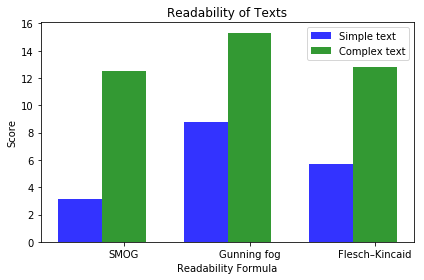

In [4]:
plotReadability(simple_text, complex_text, 'Simple text', 'Complex text')

# Type-Token Ratio (TTR)

Type-Token ratio (TTR) is a measure of lexical complexity. The higher the TTR, the larger the amount of lexical variation of a written text.

In [9]:
def calcTTR(text):
    text = text.lower()
    words = text.split()
    unique_words = []
    
    for word in words:
        if word not in unique_words:
            unique_words.append(word)
    
    # Number of words
    token_count = len(words);
    # Number of unique words
    type_count = len(unique_words);
    
    return type_count / token_count

In [10]:
print('TTR:')
print('Simple text: ' + str(calcTTR(simple_text)))
print('Complex text: ' + str(calcTTR(complex_text)))

TTR:
Simple text: 0.6727272727272727
Complex text: 0.7439024390243902


# Syntax Tree Depth

The depth of a sentence's syntax tree is a measure of the sentence's complexity.

In [7]:
from nltk.parse.corenlp import *
from nltk.tokenize import sent_tokenize, word_tokenize

def calcDepth(text):
    parser = CoreNLPParser()
    
    def calcSingleDepth(sent):
        parse = next(parser.raw_parse(sentence))
        #parse.pretty_print()
        return parse.height()
    
    sentences = sent_tokenize(text)
    totalDepth = 0
    
    for i in range(len(sentences)):
        sentence = sentences[i]
        totalDepth += calcSingleDepth(sentence)
        
    return totalDepth / len(sentences)

In [8]:
print('Sentence syntax tree depth:')
print('Simple text: ' + str(calcDepth(simple_text)))
print('Complex text: ' + str(calcDepth(complex_text)))

Sentence syntax tree depth:


ConnectionError: HTTPConnectionPool(host='localhost', port=9000): Max retries exceeded with url: /?properties=%7B%22outputFormat%22%3A+%22json%22%2C+%22annotators%22%3A+%22tokenize%2Cpos%2Clemma%2Cssplit%2Cparse%22%2C+%22ssplit.ssplit.eolonly%22%3A+%22true%22%2C+%22tokenize.whitespace%22%3A+%22false%22%7D (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000023D10D2B160>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

# Resources

 - Readability Python Package: https://pypi.org/project/textstat/
 - Stanford CoreNLP: https://stanfordnlp.github.io/CoreNLP/download.html
 - CoreNLP Server Guide: https://stanfordnlp.github.io/CoreNLP/corenlp-server.html#getting-started